# Q3

A cantilevered bracket is bolted to a column with three M14X2 bolts as shown in the figure below. Determine,

a) Centroid of the bolts

b) The allowable load, P if the shearing stress in bolt 2 is limited to 143MPa

In [115]:
# Required
import matplotlib.pyplot as plt
import numpy as np
from math import pi, radians, degrees, dist, atan, sqrt, cos, sin
from matplotlib.patches import FancyArrowPatch

In [116]:
# Info from question
coorA = [0,0]
coorB = [100,0]
coorC = [200,0]

# PLoad unknown
shearStress = 143E+6
boltDiameter = 14E-3
CentroidToLoad = 100

In [117]:
print('1. Centroid ')


xBar = (coorA[0]+coorB[0]+coorC[0])/3
yBar = (coorA[1]+coorB[1]+coorC[1])/3
print(f'x bar = {xBar}')
print(f'y bar = {yBar}')
print(f'Centroid is at Bolt B')


1. Centroid 
x bar = 100.0
y bar = 0.0
Centroid is at Bolt B


In [118]:
print('2. Find distance between bolts and centroid')
Centroid = [xBar, yBar]
rA = dist(coorA, Centroid)
rB = dist(coorB, Centroid)
rC = dist(coorC, Centroid)
print(f'rA = {rA}')
print(f'rB = {rB}')
print(f'rC = {rC}')

2. Find distance between bolts and centroid
rA = 100.0
rB = 0.0
rC = 100.0


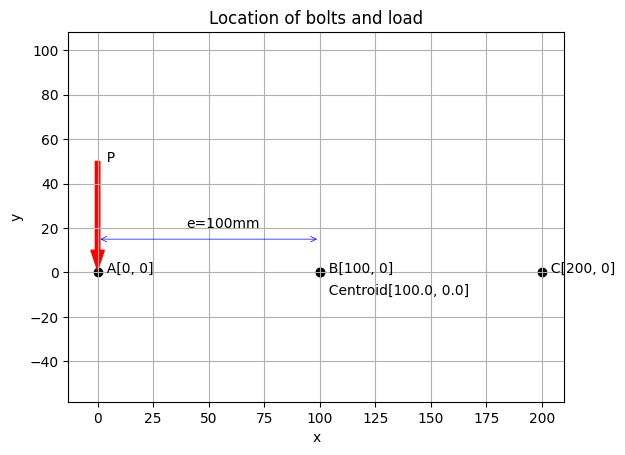

In [119]:
loadLocation = [0, 0]
centroid = [xBar,yBar]
data = np.array([coorA,coorB,coorC,centroid])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=2,color='r')
# ax.hlines(Fproof,0,10000)
# ax.hlines(Fi,0,10000)

ax.set(xlabel='x', ylabel='y',
       title='Location of bolts and load')

ax.text(coorA[0],coorA[1],f'  A{coorA}')
ax.text(coorB[0],coorB[1],f'  B{coorB}')
ax.text(coorC[0],coorC[1],f'  C{coorC}')
ax.text(centroid[0],centroid[1]-10,f'  Centroid{centroid}')
ax.text(loadLocation[0],loadLocation[1]+50,f'  P')
ax.text(coorA[0]+40,coorA[1]+20,f'e=100mm')

ax.annotate("",
            xy=(100, 15),  # End point of the arrow
            xytext=(0, 15),  # Start point of the arrow
            arrowprops=dict(arrowstyle="<->",  # Double-headed arrow style
                            color="blue",
                            linewidth=0.5))

plt.axis('equal')
plt.show()

In [120]:
print('3. Find Tangential Force')
# directShear = PLoad/3
# Fta = (PLoad*CentroidToLoad*rA)/(sum(i*i for i in [rA,rB,rC]))
directShear = 1/3
Fta = (CentroidToLoad*rA)/(sum(i*i for i in [rA,rB,rC]))
# print(f'Tangential Force at A, Fta = {Fta:.1f}N')
print('Find Fta and leave P as unknown')
print(f'Direct shear at A, P/3 = {directShear}P')
print(f'Tangential Force at A, Fta = {Fta}P')

3. Find Tangential Force
Find Fta and leave P as unknown
Direct shear at A, P/3 = 0.3333333333333333P
Tangential Force at A, Fta = 0.5P


In [121]:
print('Analyze bolt A')
# theta = 90
# print(f'Angle for Tangential force, theta = {theta}')

Fay = (directShear)+Fta
Fax = 0
Fa = np.hypot(Fax,Fay)
print(f'Fay = {Fay}P')
print(f'Fax = {Fax}P')
print(f'Fa = {Fa}P')

Analyze bolt A
Fay = 0.8333333333333333P
Fax = 0P
Fa = 0.8333333333333333P


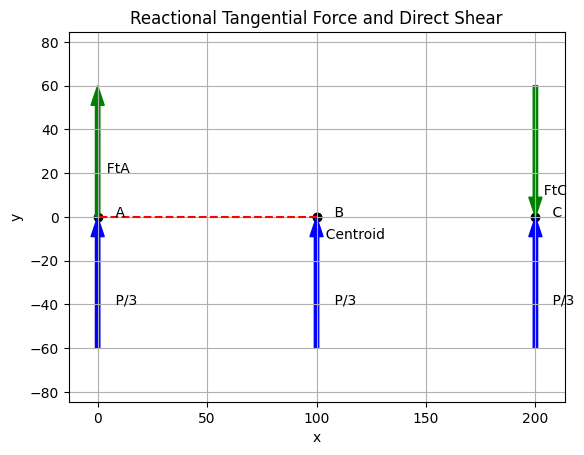

In [122]:
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
# ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='r')
ax.arrow(coorA[0],coorA[1], 0,60,width=2,color='g', length_includes_head='False')
# ax.arrow(coorB[0]+30,coorB[1]-60, -30,60,width=2,color='g', length_includes_head='False')
ax.arrow(coorC[0],coorC[1]+60, 0,-60,width=2,color='g', length_includes_head='False')
# ax.arrow(coorD[0]-75,coorD[1]+60, 75,-60,width=3,color='g', length_includes_head='False')

# Direct Shear
for i in [coorA,coorB,coorC]:
       ax.arrow(i[0],i[1]-60, 0,60,width=2,color='b', length_includes_head='False')
       # ax.text(i[0],i[1],f'    {i}')

ax.set(xlabel='x', ylabel='y',
       title='Reactional Tangential Force and Direct Shear')

coorBolts = [coorA,coorB,coorC]
boltLabel = ['A','B','C','D']
for i in range(3):
       ax.text(coorBolts[i][0],coorBolts[i][1],f'    {boltLabel[i]}')
       ax.text(coorBolts[i][0],coorBolts[i][1]-40,f'    P/3')


# ax.plot([coorA[0],centroid[0],coorB[0]], [coorA[1],centroid[1],coorB[1]], 'b--')
ax.plot([centroid[0],coorA[0]], [centroid[1],coorA[1]], 'r--')

ax.text(centroid[0],centroid[1]-10,f'  Centroid')
ax.text(coorBolts[0][0],coorBolts[0][1]+20,f'  FtA')
# ax.text(coorBolts[1][0]+20,coorBolts[1][1]-20,f'FtB')
ax.text(coorBolts[2][0],coorBolts[2][1]+10,f'  FtC')

plt.axis('equal')
plt.show()

In [123]:
print('5. Find P from Shear equation')

PLoad = shearStress*(pi*pow(boltDiameter,2)/4)/Fa

print(f'Load, P = {PLoad:.1f}N')

5. Find P from Shear equation
Load, P = 26415.8N
